# Clusters. Final. <p>
Parsons School of Design<p>
Machine Learning, Assigment 3<p>
Eduardo Montilla<b>



In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pltw
from sklearn.cluster import KMeans
from sklearn.externals import joblib
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import random

%matplotlib inline

## Read and Describe the Metadata

In [62]:
fpn_csv = '/Users/Eduardo/Clustering_Art/ClustersExercise3/cluster_images.csv'
data = pd.read_csv(fpn_csv, encoding='ISO-8859-1')
sandbox = '/Users/Eduardo/Clustering_Art/Final_submit/sandbox/'

In [63]:
root_dir = '/Users/Eduardo/Clustering_Art/ClustersExercise3'
ci_path = root_dir + '/img_small/' # cropped images for training

In [64]:
data.head(1)

,s_no,artist,title,art_movement,museum_venue,country_of_origin,has_text,primary_medium,medium,work_size,...,va,te,co,or,sh,reflection,po,li,ar,notes
0,2,Giorgio de Chirico,The Uncertainty of the Poet,surrealism,Tate,Italy,False,painting,"painting, oil on canvas",106 x 94 cm,...,3,0,0,4,3,False,0,0,5,"distorted perspective, shadow, signification o..."


# Adicional Features 

In [65]:
a= data['va'] 
b= data['si'] 
vs= a+b
c= data['te'] 
d= data['co'] 
tc= c+d
e= data['ar'] 
f= data['va']
av= e+f
g= data['or'] 
h= data['sh'] 
os = g+h
data['vs'] = vs
data['tc'] = tc
data['av'] = av
data['os'] = os
data.head(5)

,s_no,artist,title,art_movement,museum_venue,country_of_origin,has_text,primary_medium,medium,work_size,...,sh,reflection,po,li,ar,notes,vs,tc,av,os
0,2,Giorgio de Chirico,The Uncertainty of the Poet,surrealism,Tate,Italy,False,painting,"painting, oil on canvas",106 x 94 cm,...,3,False,0,0,5,"distorted perspective, shadow, signification o...",5,0,8,7
1,3,Giovanni Anselmo,Direction,arte povera,Tate,Italy,False,sculpture,"sculpture, fabric, glass & metal",24 x 420 x 335 cm,...,2,False,0,0,5,"hard to understand the viewpoint, sense of for...",4,3,6,5
2,4,Milton Avery,Yellow Sky,modernism,Tate,America,False,painting,"painting, oil on canvas",156 x 184 cm,...,4,False,0,0,5,"flatish, textured shapes & specific colors-lin...",2,8,7,6
3,5,Gillian Avery,Distillation,abstraction,Tate,UK,False,painting,"painting, oil, household paint on hardboard",213 x 152 cm,...,4,False,0,0,5,"shapes, layers, paint handlng/texture, orienta...",4,2,6,6
4,6,Joseph (Jef) Banc,Pair-Bearing Matrix,abstraction,Tate,France,False,painting,"painting, mixed media on canvas",73 x 60 cm,...,4,False,0,0,5,"ambiguity through abstraction, odd shape, v te...",1,5,6,4


### Create a Subset of the Columns  to Fit KMeans

 
In this final iteration, I was exploring shape, color, mix of features and different number of clusters. For example:<p>

<h3> Shape </h3>

'si' defines variations in height, width, area.<p>
'te' defines variation in the fineness or coarseness of an area having a given value. <p>
'or' defines various orientations, ranging from the vertical to the horizontal in a distinct direction<p>
'sh' defines a mark with a constant size can nonetheless have an infinite number of different shapes<p>
'ar' defines an area that has a measurable size. <p>

<h3> Color </h3><p>

'va' defines the various degrees between white and black<br>	
'co' defines hue, using the repertoire of colored sensations which can be produced at equal value.<p>
    
<h3> Mix </h3><p>
    
'vs' Defines various degrees white and blank and variations in size (va + si)<p>
'tc' defines variation in the fineness or coarseness and repertoire of colored sensations (te + co)  <p> 
'os' orientations, ranging from the vertical to the horizontal (or + sh)<p>
  


In [66]:

X = data[[ 'si','te','or', 'sh', 'ar','va', 'co','vs','tc','os', ]]

In [67]:
X.head()

,si,te,or,sh,ar,va,co,vs,tc,os
0,2,0,4,3,5,3,0,5,0,7
1,3,3,3,2,5,1,0,4,3,5
2,0,4,2,4,5,2,4,2,8,6
3,3,2,2,4,5,1,0,4,2,6
4,0,4,0,4,5,1,1,1,5,4


## Create Silhouette Plots to Assess Various Specifications for `n_clusters` in `KMeans`

In [68]:
# modify this list to include the numbers of clusters you want to see
range_n_clusters = [20]

 For n_clusters = 20 The average silhouette_score is : 0.2119029817081636



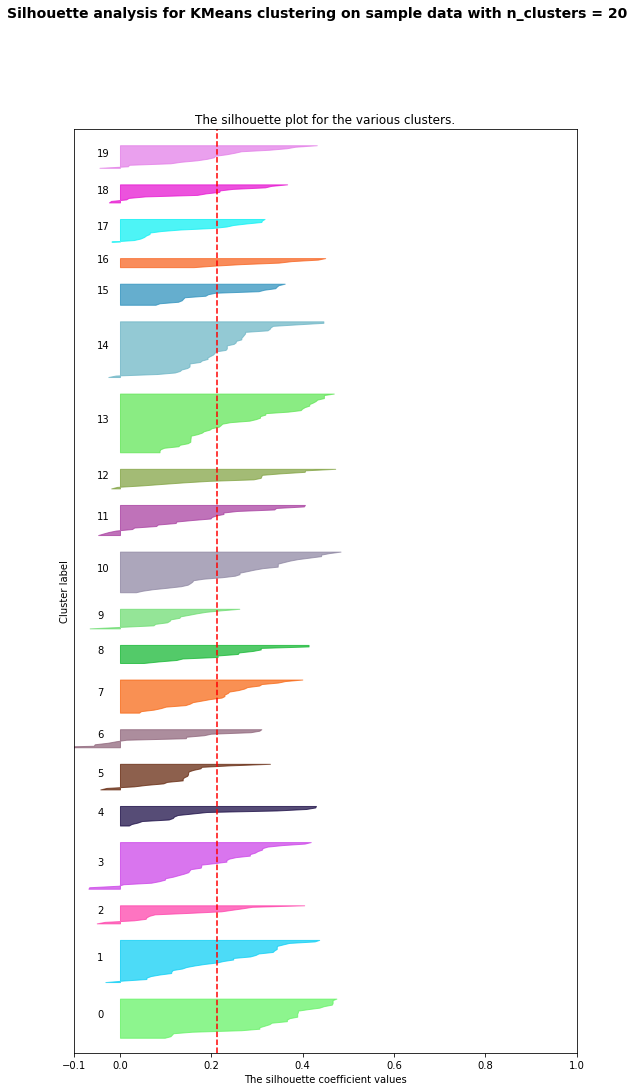

In [69]:
# modified from: http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html



for n_clusters in range_n_clusters:
    # Create a subplot
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(9, 17)

    # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(" For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # select a random color for this cluster
        r = lambda: random.randint(0,255)
        color = '#%02X%02X%02X' % (r(),r(),r())
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    print('')
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

## Final fit


In [70]:
# set the number of clusters in the final model
my_n_clusters = 20

In [71]:
km = joblib.load('km_final.pkl')
print(X.shape)

(404, 10)


## Results


In [73]:
f = open(sandbox + "cluster_final_submit.html","w")
for i in range(0, max(km.labels_)+1):
    print(" ")
    print("* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * ")
    f.write("<br><p><h1> Cluster:" + str(i) +"</h1><hr><br><p>")
    print("Images in cluster: " + str(i))
    print("* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * ")
    for j in range(0, len(km.labels_)):
       if km.labels_[j] == i:
            #print(ci_path + str(j+2) + '_small.jpg')
            print(str(j+2) + '_small.jpg')
            f.write("<img src='"+ ci_path + str(j+2) + '_small.jpg'+ " 'width='100'"">\n")
            
f.close()  

 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 0
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
2_small.jpg
33_small.jpg
56_small.jpg
96_small.jpg
99_small.jpg
126_small.jpg
157_small.jpg
228_small.jpg
229_small.jpg
230_small.jpg
289_small.jpg
292_small.jpg
297_small.jpg
352_small.jpg
373_small.jpg
377_small.jpg
380_small.jpg
394_small.jpg
 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 1
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
27_small.jpg
29_small.jpg
36_small.jpg
60_small.jpg
84_small.jpg
115_small.jpg
131_small.jpg
175_small.jpg
176_small.jpg
191_small.jpg
199_small.jpg
200_small.jpg
204_small.jpg
212_small.jpg
215_small.jpg
218_small.jpg
240_small.jpg
250_small.jpg
257_small.jpg
258_small.jpg
260_small.jpg
264_small.jpg
266_small.jpg
272_small.jpg
275_small.jpg
282_small.jpg
320_small.jpg
331_small.jpg
342_small.jpg
384_small.jpg
 
* * * * * * * * * * * * * * * * * * * * * * * *